OLD: Attempt with pyrosm

In [1]:
# Requires to have geopandas installed
# Installation https://geopandas.org/getting_started/install.html

import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot
import pandas as pd
import fiona  # ;help(fiona.open)
import requests
from pandas import json_normalize
import requests  # convert json into dataframe

# For OSM
import pyrosm
import numpy as np
from pyrosm import OSM, get_data

In [3]:
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

#  Adding MENA to Africa

In [4]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
# world

In [5]:
saudi = world.query('name == "Saudi Arabia"')
yemen = world.query('name == "Yemen"')
iraq = world.query('name == "Iraq"')
oman = world.query('name == "Oman"')
uae = world.query('name == "United Arab Emirates"')
jordan = world.query('name == "Jordan"')
palestine = world.query('name == "Palestine"')
israel = world.query('name == "Israel"')
qatar = world.query('name == "Qatar"')
kuwait = world.query('name == "Kuwait"')

mena = (
    saudi.append(yemen)
    .append(iraq)
    .append(oman)
    .append(uae)
    .append(jordan)
    .append(palestine)
    .append(israel)
    .append(qatar)
    .append(kuwait)
)

In [6]:
africa = world.query('continent == "Africa"').append(mena)
# africa.head()

In [7]:
### Example plot https://geopandas.org/gallery/plotting_with_geoplot.html?highlight=africa

# #gdp_per_cap = world.gdp_md_est / world.pop_est
# ax = geoplot.cartogram(
#     africa, scale='pop_est', limits=(0.2, 1),
#     edgecolor='None', figsize=(7, 8)
# )
# geoplot.polyplot(africa, edgecolor='gray', ax=ax)

In [7]:
# ax = africa.plot(color="white", edgecolors="red",figsize=(10, 10))

# 3) Substations - Onsset - OSM

Install PYROSM to handle OSM data: https://pyrosm.readthedocs.io/en/latest/installation.html

data source http://download.geofabrik.de/  

data description: https://gep-onsset.readthedocs.io/en/latest/GIS%20data%20collection.html

### OSM content check

In [8]:
from pyrosm import OSM, get_data

# Initialize the OSM reader with test data
fp = get_data("Helsinki")
osm = OSM(fp)

# The instance has a configuration attribute containing:
print([item for item in osm.conf.__dict__.keys() if not item.startswith("_")])

['network_filters', 'tags', 'oneway_values']


In [9]:
# Show all available tag attributes
# osm.conf.tags.available

In [10]:
# Show all tags that are converted into columns from building features
osm.conf.tags.power

['cable',
 'catenary_mast',
 'compensator',
 'converter',
 'generator',
 'heliostat',
 'insulator',
 'line',
 'busbar',
 'bay',
 'minor_line',
 'plant',
 'pole',
 'portal',
 'power',
 'substation',
 'switch',
 'switchgear',
 'terminal',
 'tower',
 'transformer']

## Create OSM substation dataframe

Pyrosm has an existing issue handling geofabric data. Thats why "get_data("africa")" is not working. 

A way around this problem is to download the data from http://download.geofabrik.de/africa-latest.osm.bz2 locally & set the path right

://github.com/HTenkanen/pyrosm/issues/109

In [11]:
pwd

'/home/matin/pypsa-africa/data_exploration'

In [12]:
cd

/home/matin


In [13]:
cd "OneDrive/PHD-Flexibility/07_pypsa-africa/Data"

[Errno 2] No such file or directory: 'OneDrive/PHD-Flexibility/07_pypsa-africa/Data'
/home/matin


In [14]:
africa_data = "africa-latest.osm.pbf"

In [15]:
# Possible input to extract data from PYROSM. I.e. get_data("angola") gets the "angola-latest.osm.pbf" filled with all OSM data
regions = [
    "algeria",
    "angola",
    "benin",
    "botswana",
    "burkina_faso",
    "burundi",
    "cameroon",
    # "canary_islands",
    "cape_verde",
    "central_african_republic",
    "chad",
    # "comores",
    "congo_brazzaville",
    "congo_democratic_republic",
    "djibouti",
    "egypt",
    "equatorial_guinea",
    "eritrea",
    "ethiopia",
    "gabon",
    "ghana",
    "guinea_bissau",
    "guinea",
    "ivory_coast",
    "kenya",
    "lesotho",
    "liberia",
    "libya",
    "madagascar",
    "malawi",
    "mali",
    "mauritania",
    "mauritius",
    "morocco",
    "mozambique",
    "namibia",
    "niger",
    "nigeria",
    "rwanda",
    # "saint_helena_ascension_and_tristan_da_cunha",
    # "sao_tome_and_principe",
    "senegal_and_gambia",
    # "seychelles",
    "sierra_leone",
    "somalia",
    "south_africa_and_lesotho",
    "south_africa",
    "south_sudan",
    "sudan",
    "swaziland",
    "tanzania",
    "togo",
    "tunisia",
    "uganda",
    "zambia",
    "zimbabwe",
]

In [16]:
fp = get_data("lesotho")

In [17]:
fp = "/home/matin/pypsa-africa/Africa-node.osm.pbf"

In [18]:
osm = pyrosm.OSM(fp)

In [19]:
my_filter = {"power": ["substation"]}

In [20]:
lesotho = osm.get_pois(custom_filter=my_filter)

In [76]:
lesotho.head(5)

,power,substation,id,timestamp,version,tags,osm_type,geometry
0,substation,distribution,102856011,1577870864,6,"{""name"":""Maseru Substation"",""barrier"":""fence"",...",way,"POLYGON ((27.46457 -29.29569, 27.46469 -29.296..."
1,substation,distribution,170577677,1577861572,4,"{""name"":""Ramotobolo Substation"",""fixme"":""Check...",way,"POLYGON ((28.40970 -29.32655, 28.40989 -29.326..."
2,substation,minor_distribution,170577678,1577875635,6,"{""name"":""Katse Dam Substation"",""fixme"":""Check ...",way,"POLYGON ((28.49659 -29.34149, 28.49660 -29.341..."
3,substation,transmission,170584567,1577875635,5,"{""name"":""Thibeli Substation"",""fixme"":""Check de...",way,"POLYGON ((28.48037 -29.16502, 28.48037 -29.164..."
4,substation,transmission,170611627,1577871666,6,"{""barrier"":""fence"",""voltage"":""132000"",""operato...",way,"POLYGON ((28.11432 -29.42590, 28.11446 -29.426..."


In [78]:
# Shows geometry reference
lesotho["geometry"].crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [80]:
# Converting Polygons to "centroids" = Points.

# We used "epsg=3035" to make the long/lat numbers larger.
# This was necessary to make the centroid operations more accurate. Only required for small polygons.
# Afterward we reconvert it to the standard epsg=4326

lesotho["geometry"] = lesotho["geometry"].to_crs(epsg=3035)
lesotho["geometry"] = lesotho["geometry"].centroid
lesotho["geometry"] = lesotho["geometry"].to_crs(epsg=4326)

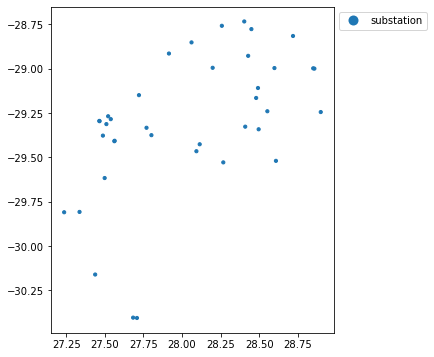

In [81]:
# Plot
ax = lesotho.plot(
    column="power",
    marker="o",
    markersize=10,
    figsize=(6, 6),
    legend=True,
    legend_kwds=dict(loc="upper left", ncol=5, bbox_to_anchor=(1, 1)),
)

<AxesSubplot:>

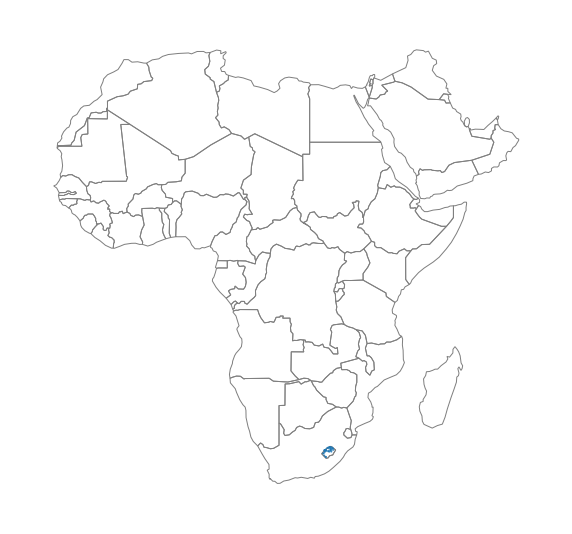

In [82]:
# Worked! Lesotho is downn i
ax = lesotho.plot(column="power", figsize=(10, 10), alpha=0.7, markersize=1)
geoplot.polyplot(africa, edgecolor="gray", ax=ax)

# Overpass API


In [29]:
# some_file.py
import sys

# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(
    1, "/home/max/OneDrive/PHD-Flexibility/07_pypsa-africa/0github/pypsa-africa/scripts"
)

In [30]:
from osm_data_config import CC

In [32]:
##Example for CC
print(len(CC))
CC["GR"]

249


'GREECE'

In [2]:
url = "https://lz4.overpass-api.de/api/interpreter"  # Overpass API URL

In [3]:
# Africa list
# c_list = ["DZ","AO","SH","BJ","BW","BF","BI","CM","CV","CF","TD","KM","CG","CD","DJ","EG","GQ","ER","SZ","ET","GA","GM","GH","GN","GW","CI","KE","LS","LR","LY","MG","MW","ML","MR","MU","YT","MA","MZ","NA","NE","NG","RE","RW","ST","SN","SL","SO","ZA","SS","SD","SZ","TZ","TG","TN","UG","CD","ZM","TZ","ZW"]

# Test list
c_list = ["NG", "ZA", "EG"]
# len(c_list)

In [5]:
substations = []
df = []

for country_code in c_list:

    # Bounding Boxes
    query = f"""
  [out:json];
  // gather results
  (
    // query part for: “power=substation”
    ( area["ISO3166-1"={country_code}];) ->.a;
    node["power"="substation"](area.a);
    way["power"="substation"](area.a);
    relation["power"="substation"](area.a);
  );
  // print results
  out body;
  """
    try:
        r = requests.get(url, params={"data": query})
        data = r.json()["elements"]  # read response as JSON and get the data
        df = pd.json_normalize(data)  # create a DataFrame from the data
        # display(df)
    except:
        print("problems with {country_code}")
    ## Create column with country name
    # df['country'] = country_code

    # create lists
    substations.append(df)

# Create pandas dataframe from lists after iteration
df_substation = pd.concat(substations, axis=0)
display(df_substation)

problems with {country_code}
problems with {country_code}
problems with {country_code}


TypeError: cannot concatenate object of type '<class 'list'>'; only Series and DataFrame objs are valid

In [6]:
df1 = df.dropna(subset=["tags.voltage"])

In [16]:
df1.shape()

NameError: name 'df1' is not defined

In [7]:
display(df1)

,type,id,lat,lon,tags.operator,tags.power,tags.ref,tags.name,tags.location,tags.source,...,tags.roof:shape,tags.addr:street,tags.website,tags.name:en,tags.start_date,tags.branch,tags.area,tags.source:date,members,tags.type
33,node,4799026031,5.312848,-4.104172,CIE,substation,NaN,NaN,indoor,local knowledge + GPS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,way,40851543,NaN,NaN,NaN,substation,NaN,NaN,outdoor,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,way,106049962,NaN,NaN,CIE,substation,NaN,CIE Poste de Transformation e Yopougon 2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,way,106520980,NaN,NaN,NaN,substation,NaN,Poste 225 kV Abobo,outdoor,2005 Cnes / Spot Image & Mairie Adjame,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,way,107311276,NaN,NaN,NaN,substation,NaN,NaN,outdoor,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,way,838404003,NaN,NaN,NaN,substation,NaN,Wona,NaN,Maxar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392,way,838404004,NaN,NaN,NaN,substation,NaN,Ouahigouya,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,way,839088731,NaN,NaN,NaN,substation,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404,way,878180079,NaN,NaN,NaN,substation,NaN,Site de Tranformation éléctrique de la CEB,outdoor,Maxar Standard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,NaN,NaN


In [8]:
df.isna().sum()

type                      0
id                        0
lat                     373
lon                     373
tags.operator           375
tags.power                0
tags.ref                410
tags.name               301
tags.location           262
tags.source             393
tags.substation         229
tags.operator:type      413
tags.amenity            412
tags.name:fr            411
tags.addr:city          411
tags.name:ar            413
tags.building           402
tags.frequency          411
tags.voltage            238
nodes                    42
tags.barrier            369
tags.fixme              397
tags.access             413
tags.landuse            408
tags.opening_hours      413
tags.short_name         413
tags.man_made           413
tags.street_cabinet     413
tags.building:levels    411
tags.roof:shape         412
tags.addr:street        412
tags.website            412
tags.name:en            413
tags.start_date         413
tags.branch             413
tags.area           

In [ ]:
# type, id, lat, lon, tags.voltage, node
["voltage"]
df.isna().sum()
df1 = df.dropna(subset=["tags.voltage"])